# Reference bias using expected vs observed # of bases with no coverage

* https://www.illumina.com/documents/products/technotes/technote_coverage_calculation.pdf
* https://en.wikipedia.org/wiki/DNA_sequencing_theory#Early_uses_derived_from_elementary_probability_theory
* http://seqanswers.com/forums/showpost.php?p=161353&postcount=2

The problem can be boiled down to the following question: given sequence coverage $X$, the proportion of sites with no coverage can be modelled as $Poisson(\lambda = 0)$. Under ideal conditions and infinite number of sites, the empirical counts of sites with no coverage should be exactly equal to this value.

What is the proportion of sites with no coverage in our samples? Are there some worrying differences between Neanderthal and Denisovan samples? Keep in mind that both _Denisova 4_ and _Denisova 8_ have almost the same TMRCA, significantly different from all other Neanderthals, who also give the same values between each other.

In [1]:
library(tidyverse)
library(glue)
library(here)
suppressPackageStartupMessages({library(rtracklayer); library(GenomicRanges)})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse

here() starts at /mnt/expressions/mp/ychr
Loading ychr


In [2]:
cov_df <- readRDS(here("data/rds/cov_df.rds"))

In [3]:
samples <- unique(cov_df$name)

In [4]:
samples

[1] "a00"               "den4"              "den8"             
 [4] "elsidron1"         "mez2"              "S_BedouinB-1"     
 [7] "S_Burmese-1"       "S_Dai-2"           "S_Dinka-1"        
[10] "S_Finnish-2"       "S_French-1"        "S_Gambian-1"      
[13] "S_Han-2"           "S_Ju_hoan_North-1" "S_Karitiana-1"    
[16] "S_Mandenka-1"      "S_Mbuti-1"         "S_Papuan-2"       
[19] "S_Punjabi-1"       "S_Saami-2"         "S_Sardinian-1"    
[22] "S_Thai-1"          "S_Turkish-1"       "S_Yoruba-2"       
[25] "spy1"              "ustishim"          "shotgun_mez2"     
[28] "shotgun_spy1"      "elsidron2"

In [14]:
avg_cov <- cov_df %>%
    group_by(name, regions, set) %>%
    summarise(avg_coverage = mean(coverage)) %>%
    spread(regions, avg_coverage) %>%
    rename(avg_cov = full) %>%
    select(-exome, -lippold) %>%
    filter(!str_detect(name, "elsidron"))

In [15]:
avg_cov <- avg_cov %>%
    mutate(observed_zero = round(map_dbl(name, ~ mean(filter(cov_df, name == .x)$coverage == 0)), 5),
           expected_zero = round(dpois(x = 0, lambda = avg_cov), 5),
           difference = observed_zero - expected_zero) %>%
    arrange(-difference)

In [16]:
avg_cov

name,set,avg_cov,observed_zero,expected_zero,difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
spy1,capture,0.9103632,0.48959,0.40238,0.08721
den4,capture,1.6634329,0.26006,0.18949,0.07057
den8,capture,3.6038601,0.09746,0.02722,0.07024
mez2,capture,14.6456430,0.03999,0.00000,0.03999
shotgun_mez2,shotgun_ancient,0.8879353,0.43368,0.41150,0.02218
shotgun_spy1,shotgun_ancient,0.5218778,0.61063,0.59341,0.01722
S_Mbuti-1,shotgun_modern,20.6067081,0.00152,0.00000,0.00152
S_Yoruba-2,shotgun_modern,17.1633397,0.00151,0.00000,0.00151
S_Mandenka-1,shotgun_modern,16.5460985,0.00150,0.00000,0.00150


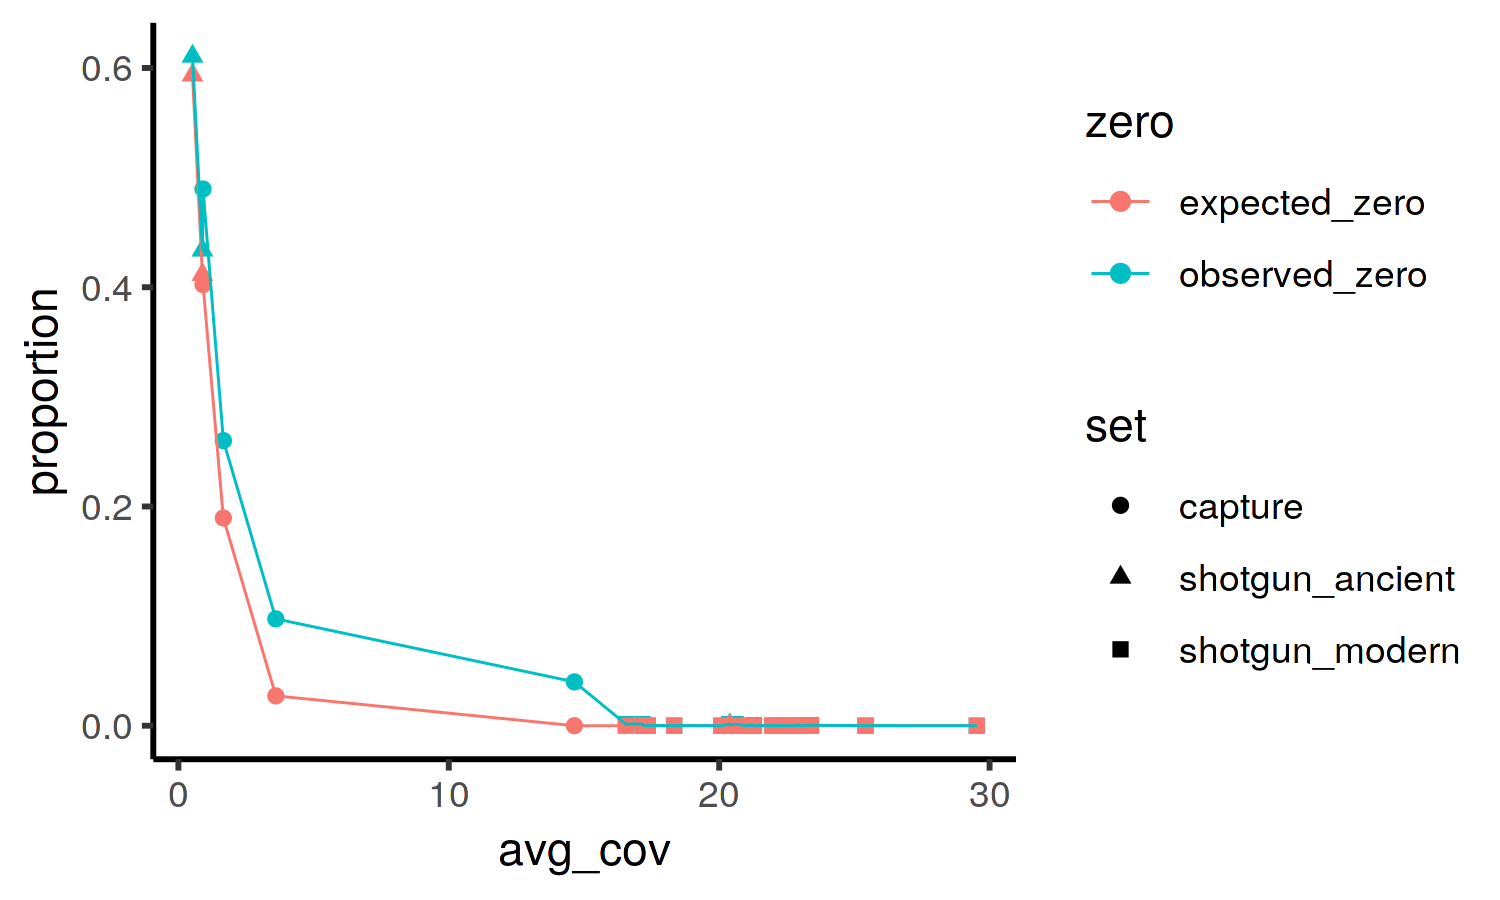

In [35]:
set_dim(5, 3)

avg_cov %>%
gather(zero, proportion, -name, -set, -avg_cov, -difference) %>%
ggplot(aes(avg_cov, proportion, color = zero)) +
    geom_point(aes(shape = set)) +
    geom_line(aes(group = zero), size = 1/4) +
    theme_classic()

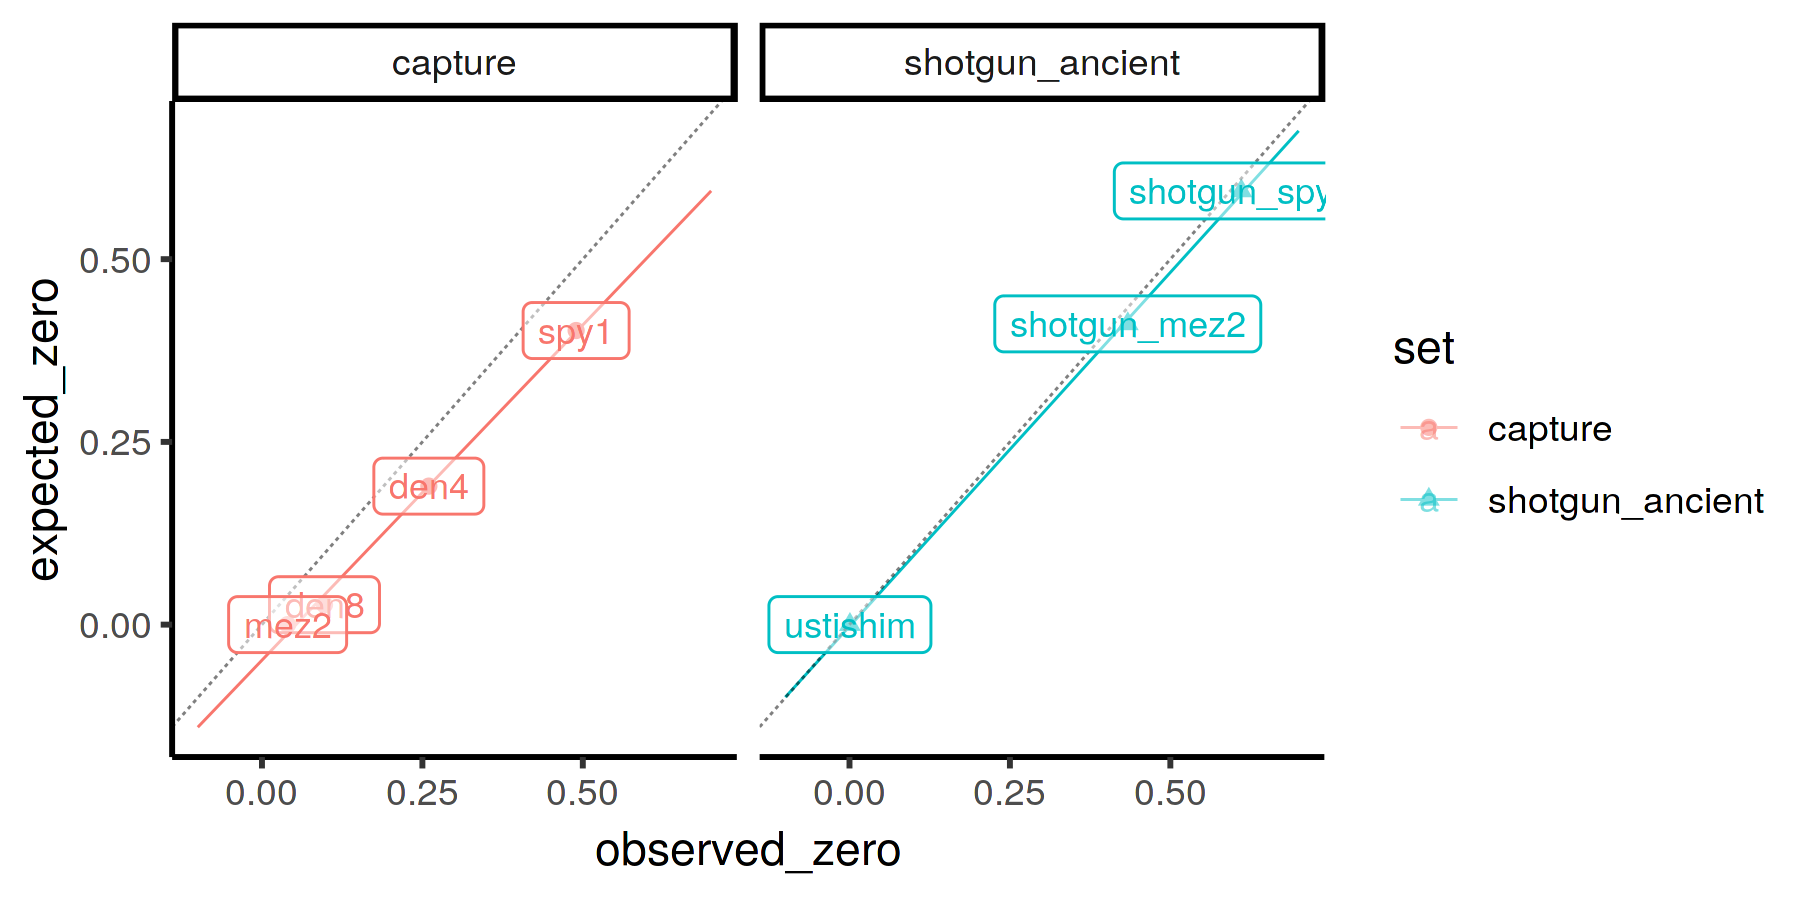

In [77]:
set_dim(6, 3)

avg_cov %>% filter(set != "shotgun_modern") %>% 
ggplot(aes(observed_zero, expected_zero, color = set)) +
    geom_point(aes(shape = set)) +
    geom_smooth(method = "lm", aes(group = set), se = FALSE, size = 1/4, fullrange = TRUE) +
    geom_abline(slope = 1, linetype = 2, size = 1/4, alpha = 1/2) +
    geom_label(aes(label = name), size = 3, alpha = 1/2) +
    expand_limits(x = c(-0.1, 0.7)) +
    facet_wrap(~ set) +
    theme_classic()